In [1]:
# # mount on google drive if you use colab.
# from google.colab import drive
# drive.mount('/content/drive/')
# # go to your code files directory
# import os
# os.chdir("/content/drive/My Drive/WatNet/dataloader")


## Loading from data path

In [1]:
import os
os.chdir('..')
from notebooks import config
import glob
import time
from utils.imgShow import imsShow
import tensorflow as tf
import matplotlib.pyplot as plt 
from dataloader.img_aug import img_aug
from dataloader.path_io import read_scene_pair, crop_patches
from dataloader.tfrecord_io import parse_image,parse_shape,toPatchPair

In [2]:
paths_tra_scene = sorted(glob.glob('data/dataset-s2/tra_scene/*'))
paths_tra_truth = sorted(glob.glob('data/dataset-s2/tra_truth/*'))
paths_val_scene = sorted(glob.glob('data/dataset-s2/val_scene/*'))
paths_val_truth = sorted(glob.glob('data/dataset-s2/val_truth/*'))
## ----- train data -----
tra_scenes, tra_truths = read_scene_pair(paths_scene=paths_tra_scene, 
                                                paths_truth=paths_tra_truth)
tra_patches, tra_truths = crop_patches(tra_scenes, tra_truths)
tra_dset = tf.data.Dataset.from_tensor_slices((tra_patches, tra_truths))\
                .map(img_aug)
tra_dset = tra_dset.batch(config.batch_size).shuffle(config.buffer_size)

## ----- validation data -----
val_scenes, val_truths = read_scene_pair(paths_scene=paths_val_scene, 
                                                paths_truth=paths_val_truth)
val_patches, val_truths = crop_patches(val_scenes, val_truths)
val_dset = tf.data.Dataset.from_tensor_slices((val_patches, val_truths))
val_dset = val_dset.batch(config.batch_size)


/home/yons/miniconda3/envs/venv-tf/lib/python3.6/site-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [ ]:
# ## -----train data----- ##
# tra_dset = tf.data.Dataset.from_tensor_slices((tra_patches, tra_truths))\
#                 .map(img_aug)
# tra_dset = tra_dset.batch(config.batch_size).shuffle(config.buffer_size)
# ## -----val data----- ##
# val_dset = tf.data.Dataset.from_tensor_slices((val_patches, val_truths))\
#                 .map(img_aug)
# val_dset = val_dset.batch(config.batch_size)
# val_dset


## Loading from tfrecord

In [4]:
### data loading from .tfrecord file
path_tra_data = 'data/tfrecord-s2/tra_data.tfrecords'
path_val_data = 'data/tfrecord-s2/val_data.tfrecords'
## ----- training data -----
tra_dset = tf.data.TFRecordDataset(path_tra_data)
tra_dset = tra_dset.map(parse_image).map(parse_shape)\
            .cache()\
            .map(toPatchPair)\
            .map(img_aug)
tra_dset = tra_dset.shuffle(config.buffer_size).batch(config.batch_size)

## ----- validation data -----
val_dset = tf.data.TFRecordDataset(path_val_data)
val_dset = val_dset.map(parse_image).map(parse_shape)\
            .map(toPatchPair)
val_dset = val_dset.batch(32)
tra_dset
val_dset





<BatchDataset shapes: ((None, 512, 512, 6), (None, 512, 512, 1)), types: (tf.float32, tf.float32)>

## check the dataset

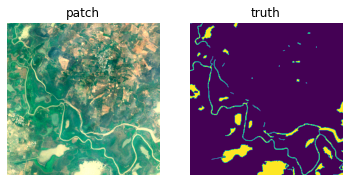

num: 2
time: 0.9615271091461182


In [5]:
# for i in range(5):
start = time.time()
i = 1
for patch, truth in val_dset.take(1):
    i+=1
imsShow(img_list=[patch[0], truth[0]], 
    img_name_list=['patch', 'truth'],
    clip_list=[2,0]
    )
plt.show()
print('num:', i)
print('time:', time.time()-start)
